In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') # downloading model

Using cache found in /Users/sarthak/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-23 Python-3.9.13 torch-1.14.0.dev20221022 CPU

Fusing layers... 
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSuLxAkosTfw2DY3oB-zU0X5AWsGWNuRmzT6Q&usqp=CAU' # random image

In [5]:
results = model(img)
results.print()

image 1/1: 168x300 2 persons, 20 cars, 3 buss, 2 trucks
Speed: 230.2ms pre-process, 282.0ms inference, 14.0ms NMS per image at shape (1, 3, 384, 640)


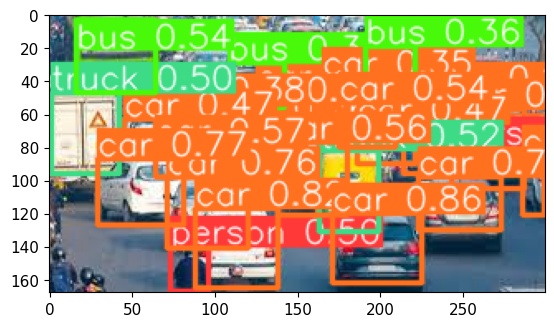

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
results.render()

[array([[[106, 111, 149],
         [ 83, 109, 142],
         [ 39,  99, 127],
         ...,
         [ 66, 102, 118],
         [ 74, 111, 130],
         [ 76, 112, 136]],
 
        [[ 67,  80, 114],
         [ 85, 112, 142],
         [ 82, 133, 162],
         ...,
         [ 64, 100, 116],
         [ 72, 109, 128],
         [ 75, 111, 135]],
 
        [[ 76,  98, 122],
         [ 69,  99, 125],
         [ 88, 128, 154],
         ...,
         [ 71, 107, 123],
         [ 72, 109, 127],
         [ 69, 105, 127]],
 
        ...,
 
        [[  3,  28,  50],
         [  3,  31,  55],
         [  0,  26,  54],
         ...,
         [102, 119, 135],
         [104, 120, 136],
         [104, 120, 135]],
 
        [[ 10,  34,  58],
         [ 13,  41,  65],
         [  2,  32,  60],
         ...,
         [170, 183, 199],
         [170, 184, 197],
         [170, 184, 197]],
 
        [[ 16,  40,  64],
         [ 27,  55,  79],
         [  5,  34,  64],
         ...,
         [178, 190, 204],
  

In [ ]:
# for showing image capture in video
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [4]:
import uuid   # Unique identifier
import os
import time

In [23]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10

In [24]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [25]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg')) # training complete

data/images/awake.e80f90be-52a4-11ed-8b4c-be690f1df0ba.jpg


In [17]:
!git clone https://github.com/tzutalin/labelImg # for labelling

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 495.00 KiB/s, done.
Resolving deltas: 100% (1242/1242), done.


In [18]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [23]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

python: can't open file '/Users/sarthak/Downloads/Driver-Fatigue-Detection-master/newtry/yolov5/yolov5/train.py': [Errno 2] No such file or directory


In [21]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/sarthak/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-23 Python-3.9.13 torch-1.14.0.dev20221022 CPU



Exception: [Errno 2] No such file or directory: 'yolov5/runs/train/exp15/weights/last.pt'. Cache may be out of date, try `force_reload=True` or see https://github.com/ultralytics/yolov5/issues/36 for help.